In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns




In [4]:
data = pd.read_csv('vgsales.csv')
data

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [5]:
data.info()
print("\nDataset Info:\n")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB

Dataset Info:



In [6]:
print("\nDuplicate Rows:")
print(data.duplicated().sum())



Duplicate Rows:
0


In [7]:
print("\nMissing Values:\n")
print(data.isnull().sum())



Missing Values:

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64


In [8]:
data = data.drop_duplicates()

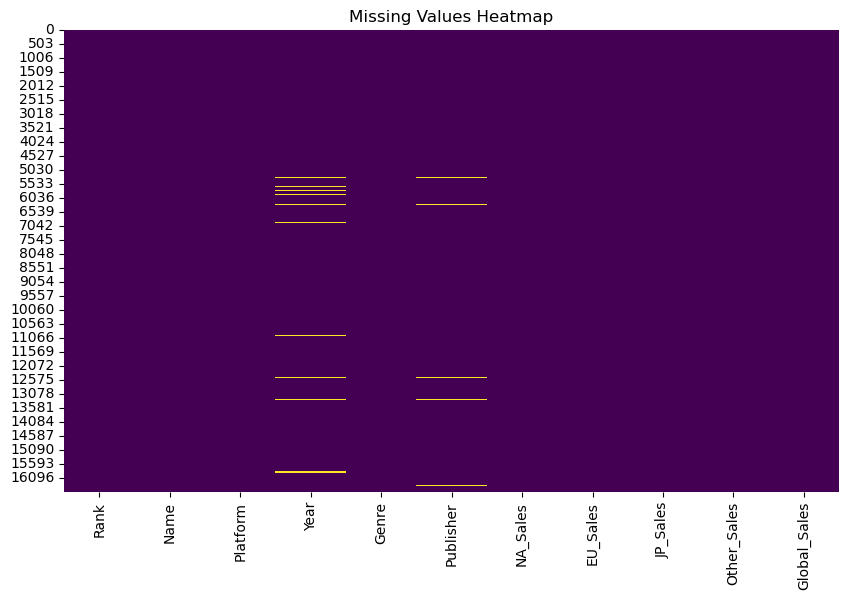

In [9]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [11]:
import pandas as pd


numeric_cols = data.select_dtypes(include=['number'])
non_numeric_cols = data.select_dtypes(exclude=['number'])


numeric_cols.fillna(numeric_cols.mean(), inplace=True)


non_numeric_cols.fillna('missing', inplace=True)

data = pd.concat([numeric_cols, non_numeric_cols], axis=1)


In [12]:
print("\nSummary Statistics:\n")
print(data.describe())


Summary Statistics:

               Rank          Year      NA_Sales      EU_Sales      JP_Sales  \
count  16598.000000  16598.000000  16598.000000  16598.000000  16598.000000   
mean    8300.605254   2006.406443      0.264667      0.146652      0.077782   
std     4791.853933      5.781197      0.816683      0.505351      0.309291   
min        1.000000   1980.000000      0.000000      0.000000      0.000000   
25%     4151.250000   2003.000000      0.000000      0.000000      0.000000   
50%     8300.500000   2007.000000      0.080000      0.020000      0.000000   
75%    12449.750000   2010.000000      0.240000      0.110000      0.040000   
max    16600.000000   2020.000000     41.490000     29.020000     10.220000   

        Other_Sales  Global_Sales  
count  16598.000000  16598.000000  
mean       0.048063      0.537441  
std        0.188588      1.555028  
min        0.000000      0.010000  
25%        0.000000      0.060000  
50%        0.010000      0.170000  
75%        0.0

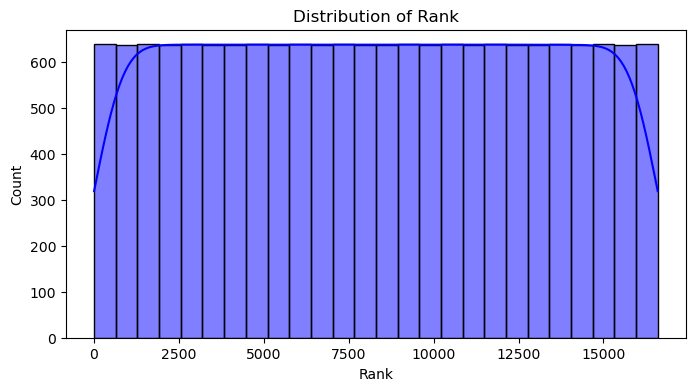

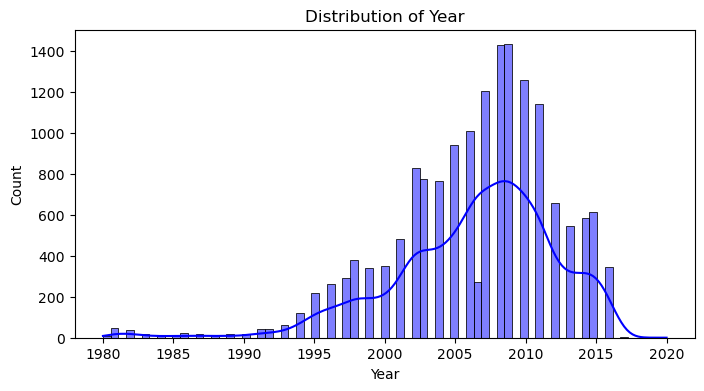

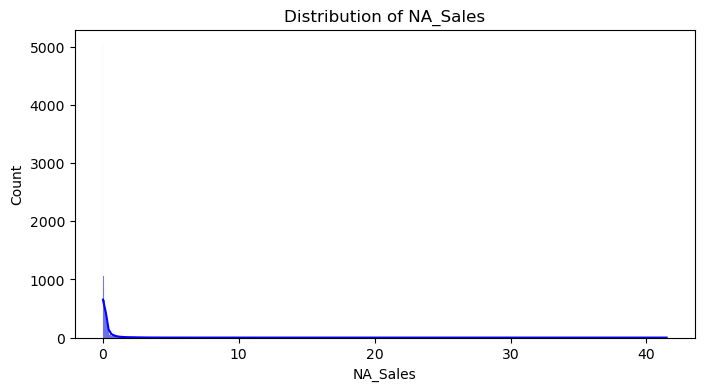

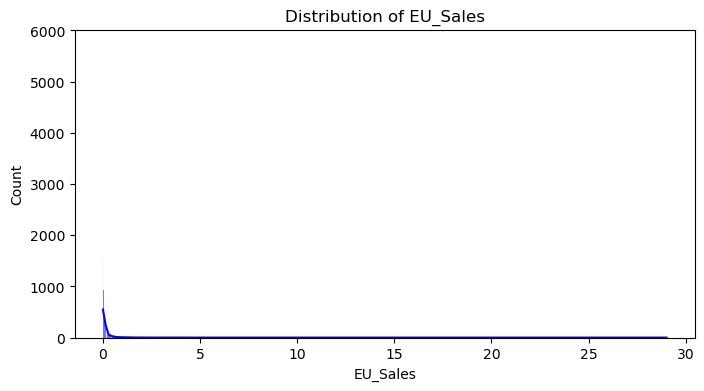

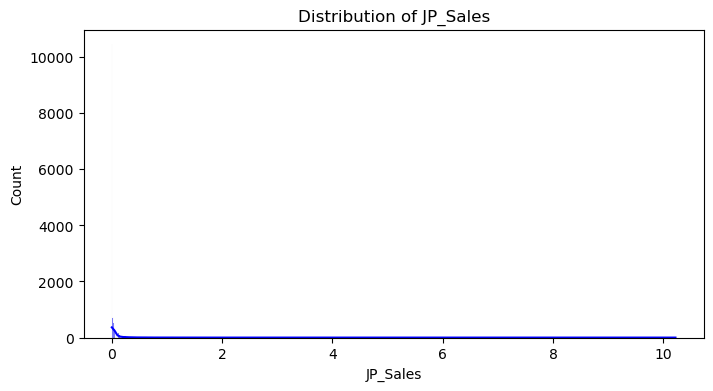

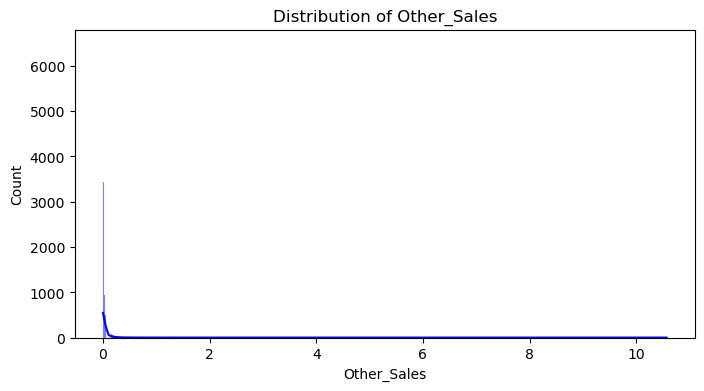

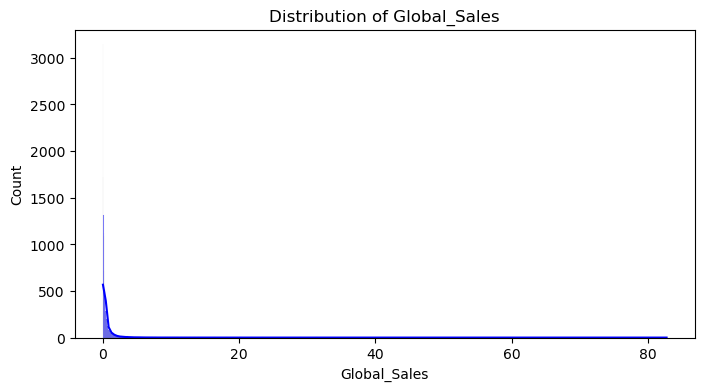

In [13]:
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[col], kde=True, color='blue')
    plt.title(f'Distribution of {col}')
    plt.show()


In [15]:
categorical_cols = data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    data[col] = data[col].astype('category').cat.codes


D:\Anaconda 2\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


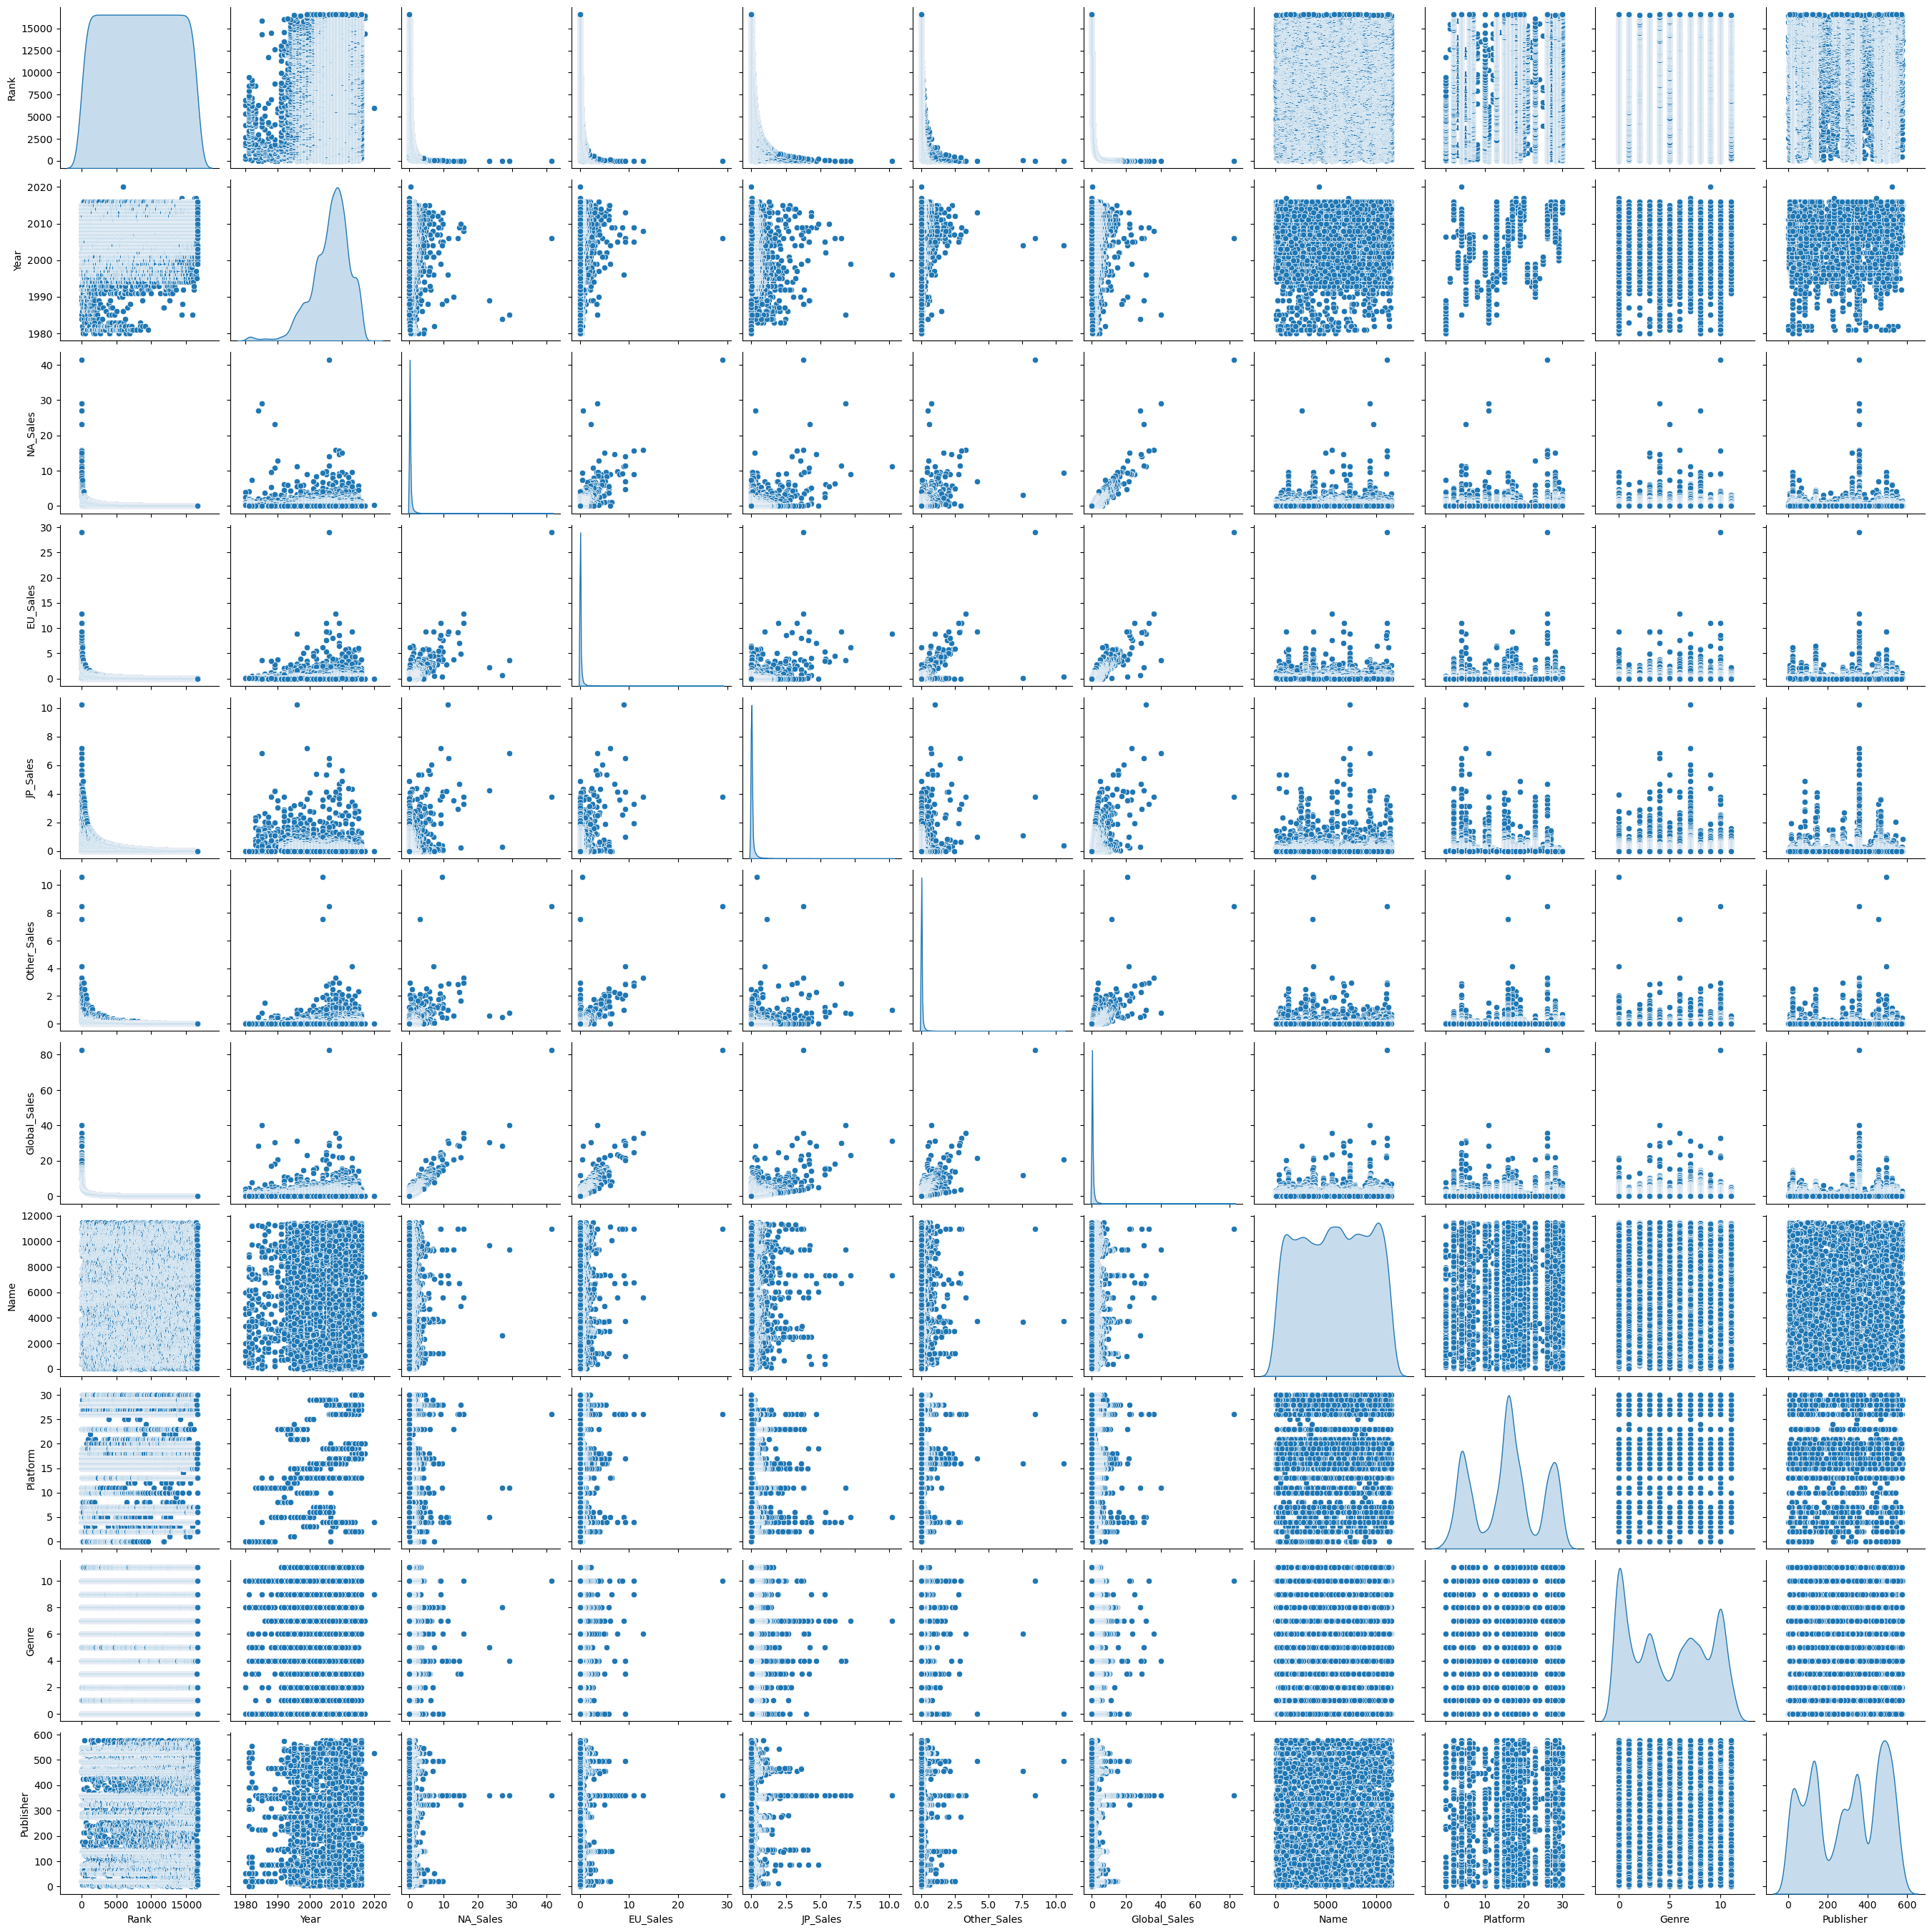

In [16]:
sns.pairplot(data, diag_kind='kde')
plt.show()

In [18]:
X = data.drop('target', axis=1, errors='ignore')
y = data['target'] if 'target' in data.columns else None


In [19]:
print("\nPreprocessed Data Preview:\n")
print(data.head())


Preprocessed Data Preview:

   Rank    Year  NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  \
0     1  2006.0     41.49     29.02      3.77         8.46         82.74   
1     2  1985.0     29.08      3.58      6.81         0.77         40.24   
2     3  2008.0     15.85     12.88      3.79         3.31         35.82   
3     4  2009.0     15.75     11.01      3.28         2.96         33.00   
4     5  1996.0     11.27      8.89     10.22         1.00         31.37   

    Name  Platform  Genre  Publisher  
0  11007        26     10        359  
1   9327        11      4        359  
2   5573        26      6        359  
3  11009        26     10        359  
4   7346         5      7        359  
